In [4]:
#Importing all the necessary packages 

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import sklearn.datasets 

In [5]:
#Figure parameters

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

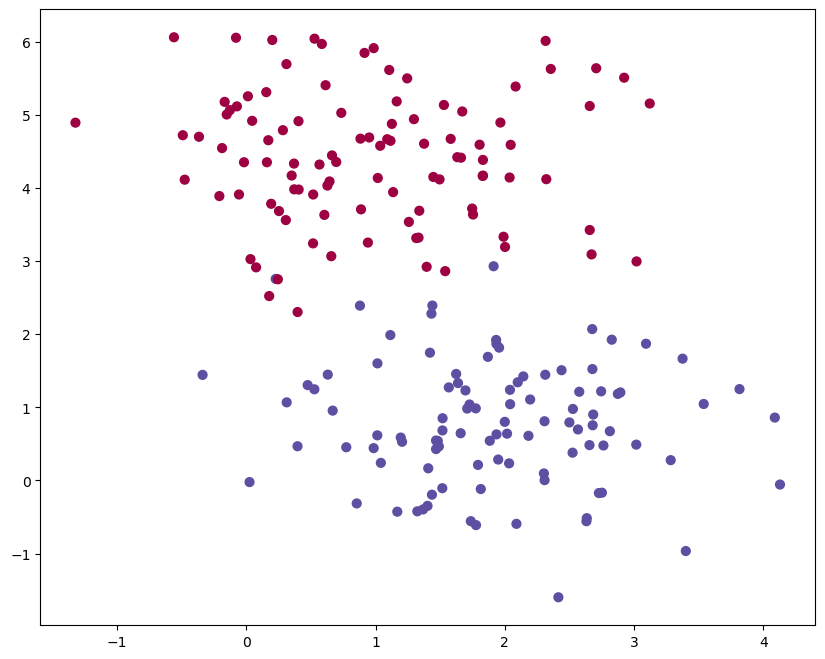

In [23]:
#Generating the dataset: 

np.random.seed(0)
X,y = sklearn.datasets.make_blobs(n_samples=200, centers=2, cluster_std=0.9)
plt.scatter(X[:,0], X[:,1], s=40, cmap=plt.cm.Spectral, c=y) #c = y sets it to either the 0 or 1 class 

#### 1. Try to tune learning rate and number of iterations
* What is the lowest error with current approach? 

In [51]:
#activation and perceptron functions
def activation(x):
    return np.where(x>0,1,0)
    
def perceptron(w,x): 
    return activation(np.dot(x,w))

In [31]:
# need to review what this means 
import time
from IPython import display

In [32]:
#boundary plotting function (also need to review it) 
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

Grid shape: (866, 646), Number of grid points: 559436


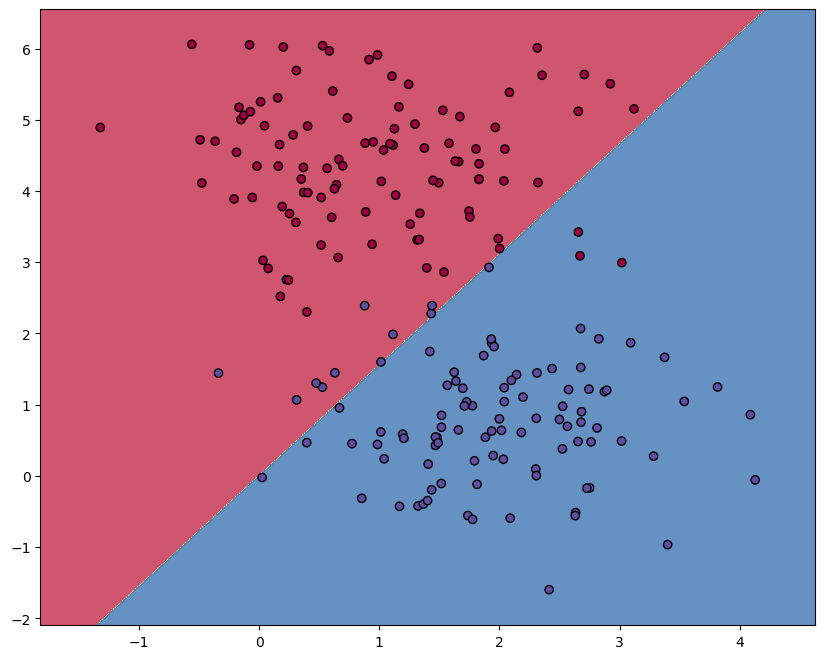

'Error:0.07'

'Iteration: 17'

Early stopping at iteration 18 with learning rate 0.001 with error: 0.065
Best learning rate: 0.001
Lowest error achieved: 0.065


In [55]:
LR = [1, 0.1, 0.01, 0.001] #Going to start with larger steps and then decrease them as we go (0.1, 0.01, 0.001)

best_lr = None
overall_best_error = float('inf')
overall_best_iteration = 0


for learning_rate in LR: 
    w = 2*np.random.random((2,)) -1 #resetting weights for each learning_rate
    errors = []
    best_error = float('inf') #set this to infinity 
    best_iteration = 0
    wait = 0
    patience = 10 
    
    for j in range(100): #number of iterations
        # get preds
        pred = perceptron(w, X)
    
        # how much did we miss?
        diff = y - pred
        error = np.mean(np.abs(diff))
        errors.append(error)

        #early stopping 
        if error < best_error: 
            best_error = error
            best_iteration = j
            wait = 0 #don't wait, keep going 

        else: 
            wait += 1

        #break the loop if you don't see improvement 10 times in a row. 
        if wait >= patience:
            print(f"Early stopping at iteration {j} with learning rate {learning_rate} with error: {best_error}")
            break 
            
        # draw result
        display.clear_output(wait=True)
        plot_decision_boundary(lambda x: perceptron(w, x))
        display.display("Error:" + str(error))
        display.display("Iteration: " + str(j))
        time.sleep(0.5)
        
        # update weights
        w = w + learning_rate * np.dot(X.T, diff) 

if best_error < overall_best_error:
    overall_best_error = best_error
    overall_best_iteration = best_iteration
    best_lr = learning_rate


print(f"Best learning rate: {best_lr}")
print(f"Lowest error achieved: {overall_best_error}")


### Answer: The lowest error with the current approach is 0.065

### 2. It's time to add learnable bias
* What is the lowest error now?*


Grid shape: (866, 646), Number of grid points: 559436


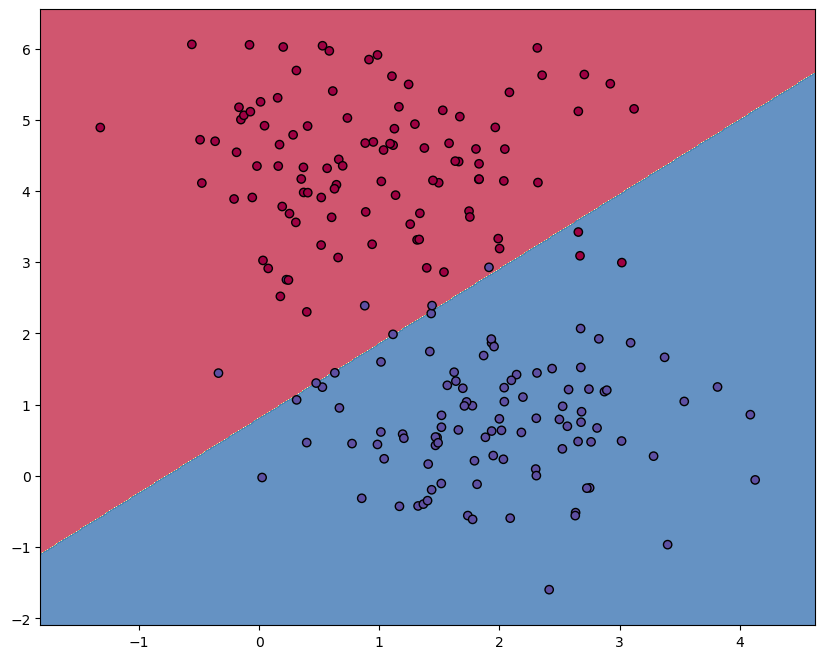

'Error:0.045'

'Iteration: 8'

In [ ]:
LR = [1, 0.1, 0.01, 0.001] #Going to start with larger steps and then decrease them as we go (0.1, 0.01, 0.001)

best_lr = None
overall_best_error = float('inf')
overall_best_iteration = 0

#adding a constant column of ones to X 
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  

for learning_rate in LR: 
    w = 2*np.random.random((3,)) -1 #Changing the weight matrix to a 3-dimensional one
    errors = []
    best_error = float('inf') #set this to infinity 
    best_iteration = 0
    wait = 0
    patience = 10 
    
    for j in range(100): #number of iterations
        # get preds
        pred = perceptron(w, X_bias)
    
        # how much did we miss?
        diff = y - pred
        error = np.mean(np.abs(diff))
        errors.append(error)

        #early stopping 
        if error < best_error: 
            best_error = error
            best_iteration = j
            wait = 0 #don't wait, keep going 

        else: 
            wait += 1

        #break the loop if you don't see improvement 10 times in a row. 
        if wait >= patience:
            print(f"Early stopping at iteration {j} with learning rate {learning_rate} with error: {best_error}")
            break 
            
        # draw result
        display.clear_output(wait=True)
        plot_decision_boundary(lambda x: perceptron(w, np.hstack((np.ones((x.shape[0], 1)), x)))) #update the plot decision boundary with the new X
        display.display("Error:" + str(error))
        display.display("Iteration: " + str(j))
        time.sleep(0.5)
        
        # update weights
        w = w + learning_rate * np.dot(X_bias.T, diff) 

    if best_error < overall_best_error:
        overall_best_error = best_error
        overall_best_iteration = best_iteration
        best_lr = learning_rate


print(f"Best learning rate: {best_lr}")
print(f"Lowest error achieved: {overall_best_error}")


Grid shape: (866, 646), Number of grid points: 559436


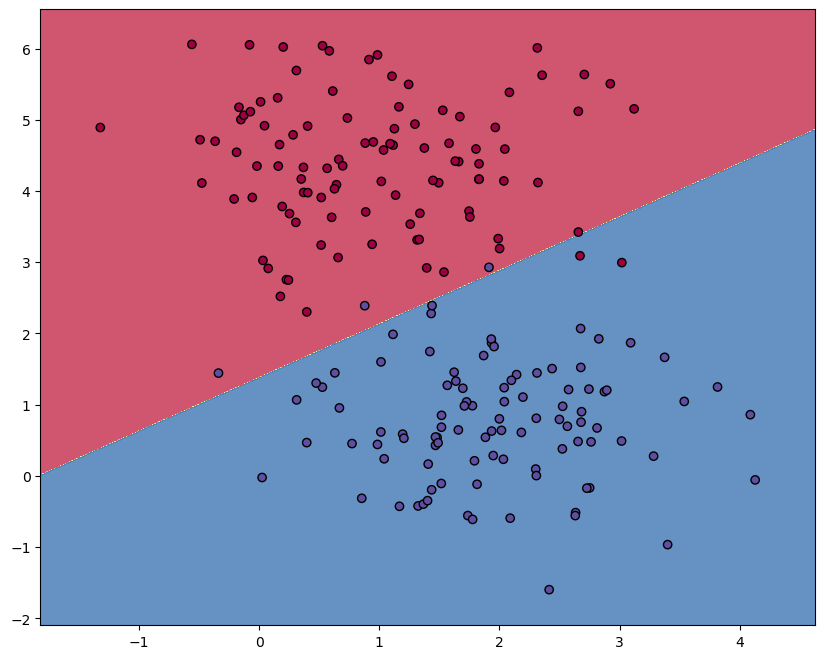

'Error: 0.03'

'Iteration: 29'

Early stopping at iteration 30 with learning rate 0.001 with error: 0.03
Best learning rate: 1
Lowest error achieved: 0.03


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

# Define activation function
def activation(x):
    return np.where(x > 0, 1, 0)

# Define perceptron function
def perceptron(w, x):
    return activation(np.dot(x, w))

# Define plot_decision_boundary function
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Flatten the grid for prediction
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Debugging: Print shapes
    print(f"Grid shape: {xx.shape}, Number of grid points: {grid_points.shape[0]}")

    # Predict the function value for the grid
    Z = pred_func(grid_points)
    
    # Reshape the result to match the grid shape
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.show()

# Initialize parameters
LR = [1, 0.1, 0.01, 0.001]  # Learning rates to try
overall_best_lr = None
overall_best_error = float('inf')
overall_best_iteration = 0

# Adding a constant column of ones to X
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

for learning_rate in LR:
    w = 2 * np.random.random((3,)) - 1  # Initialize weights including bias
    errors = []
    best_error = float('inf')
    best_iteration = 0
    wait = 0
    patience = 10
    
    for j in range(100):  # Number of iterations
        # Get predictions
        pred = perceptron(w, X_bias)
    
        # Calculate error
        diff = y - pred
        error = np.mean(np.abs(diff))
        errors.append(error)

        # Early stopping
        if error < best_error:
            best_error = error
            best_iteration = j
            wait = 0
        else:
            wait += 1

        if wait >= patience:
            print(f"Early stopping at iteration {j} with learning rate {learning_rate} with error: {best_error}")
            break
            
        # Draw result
        display.clear_output(wait=True)
        plot_decision_boundary(lambda x: perceptron(w, np.hstack((np.ones((x.shape[0], 1)), x))))
        display.display(f"Error: {error}")
        display.display(f"Iteration: {j}")
        time.sleep(0.5)
        
        # Update weights
        w = w + learning_rate * np.dot(X_bias.T, diff)
    
    # Update best learning rate based on lowest error
    if best_error < overall_best_error:
        overall_best_error = best_error
        overall_best_iteration = best_iteration
        overall_best_lr = LR[learning_rate]

print(f"Best learning rate: {overall_best_lr}")
print(f"Lowest error achieved: {overall_best_error}")